<a href="https://colab.research.google.com/github/Noodle96/Topicos_Inteligencia_Artificial/blob/main/firstNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets

In [ ]:
input_tensor = torch.tensor([[0.3471, 0.4547, -0.2356]])
input_tensor = torch.randn(1, 3)
print(input_tensor)
print(input_tensor.shape)
print(input_tensor.size())
print(input_tensor.dtype)

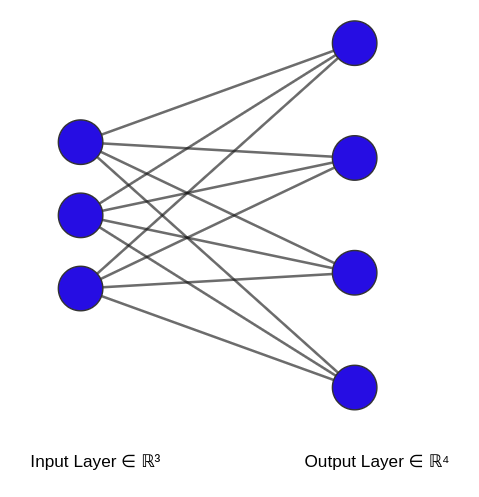



In [ ]:
# Define our first linear layer
linear_layer = nn.Linear(in_features=3, out_features=4)
print(linear_layer)

In [ ]:
linear_layer.weight

In [ ]:
linear_layer.bias

In [ ]:
# Pass input through linear layer
output = linear_layer(input_tensor)
print(output)